# Neurohackmap Project Neurohackademy 2019
## Wordcloud chapter
To visually represent the research topics and expertise of the attendees in the Neurohackademy 2019 event. 

The wordcloud here displays the research areas (words) mentioned by the attendees in different sizes increasing with the word frequency.

### Starting with installing the required libraries and data cleaning

In [1]:
#first, install the required packages (for reading data)
import numpy as np
import pandas as pd
from os import path


In [2]:
# sets the defaults for viewing the dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#identifiers for missing values
missing_values = ["  ", "-"]

#load in data
df = pd.read_csv('NeuroMap 2.csv', na_values = missing_values, encoding='latin-1')


In [11]:
## data cleaning
# rename column questions to shorter
df.columns = ['timestamp','consent','name','birthplace','birth_year', 'gender',
              'undergrad_deg','undergrad_loc',  'undergrad_inst','undergrad_research',
              'ra_qual','ra_lm_loc', 'ra_lm_inst', 'ra_lm_research',
              'masters_qual','masters_loc', 'masters_inst', 'masters_research', 
              'phd_qual','phd_loc', 'phd_inst', 'phd_research',
              'post_doc_qual', 'postdoc_loc' ,'postdoc_inst','postdoc_research', 
            'faculty_qual', 'faculty_loc', 'faculty_inst', 'faculty_research',
              'google_scholar']

# the geocoders we are going to use only work with one location at one time
# we need to replace entries that contain more than one location, and also names that contain special characters
replace_dict_birth = {
    "Tijuana, Baja California, MÌ©xico": "Tijuana, Baja California, Mexico",
    "Ìävreux, Normandy, France": "Normandy, France"
}
df['birthplace'] = df['birthplace'].replace(replace_dict_birth) 


replace_dict_undergrad = {
    "Tijuana, Baja California, MÌ©xico": "Tijuana, Baja California, Mexico",
    'Raleigh & Chapel Hill, North Carolina, USA': 'Chapel Hill, North Carolina, USA'
}
df['undergrad_loc'] = df['undergrad_loc'].replace(replace_dict_undergrad) 

replace_dict_research = {
    'Central Institute of Chemistry and Mechanics': 'Nagatinskaya, Moscow, Russia',
    'Boston, MA & San Francisco, CA': 'San Francisco, CA'    
}
df['ra_lm_loc'] = df['ra_lm_loc'].replace(replace_dict_research)

replace_dict_phd = {
    'Rio de Janeiro, Brazil AND Montreal, Canada': 'Rio de Janeiro, Brazil'
}
df['phd_loc'] = df['phd_loc'].replace(replace_dict_phd) 

replace_dict_postdoc = {
    'New Haven, CT, United States AND Durham, NC, United States': 'New Haven, CT, United States',
    '1) York, UK; 2) Sussex, UK': 'York, UK',
    'Seattle, WA and Cambridge, MA':'Seattle, WA'
}
df['postdoc_loc'] = df['postdoc_loc'].replace(replace_dict_postdoc)


## Similarity in research topics (using PhD research data as an example)

In [12]:
# assigning new variables for columns (phd_doc, phd_research) in dataframe df
phd_loc = df.phd_loc
phd_res = df.phd_research

#df.columns

In [13]:
# joining responses from all participants/entries as one long string
# here we are interested in the variable 'phd_res' (i.e. research topics) of the attendees
text=" ".join(str(dscp) for dscp in phd_res)
#print ("{} words in all combined review.".format(len(text)))


#### To plot wordcloud within a mask (any image)
The word cloud plots here are created following this tutorial on Datacamp by Duong Vu https://www.datacamp.com/community/tutorials/wordcloud-python, using the library __wordcloud__ (link here: https://github.com/amueller/word_cloud)

Words will be shown on any colours but white spaces (255, 255, 255) on the image
Yet, not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly.
The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type), and values of 1 are black.

In [14]:
#The function below transforms a mask if the mask is not in the right format (i.e. white spaces NOT shown as 255)
# e.g. in the example used here, the white spaces are shown as 0 (If you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.)

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [15]:
# packages required for plotting wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


# update the list of STOPWORDS with your own ones (so they will not appear in the wordcloud)
stopwords = set(STOPWORDS)
stopwords.update(["in","along","and","making"])


### Example 1: plot wordcloud in a head mask
<img src="img/head.png" width="150" style="float: left">


In [16]:
# Loading in a mask image here
head_mask = np.array(Image.open("img/head.png"))
if len(head_mask.shape) ==3:
 head_mask = head_mask[:,:,-1]

In [17]:
# Transform the mask into a new one that will work with the function:
# Value of white space needs to be 255
tf_head_mask = np.ndarray((head_mask.shape[0],head_mask.shape[1]), np.int32)

for i in range(len(head_mask)):
    tf_head_mask[i] = list(map(transform_format, head_mask[i]))
    
#tf_head_mask

(-0.5, 685.5, 755.5, -0.5)

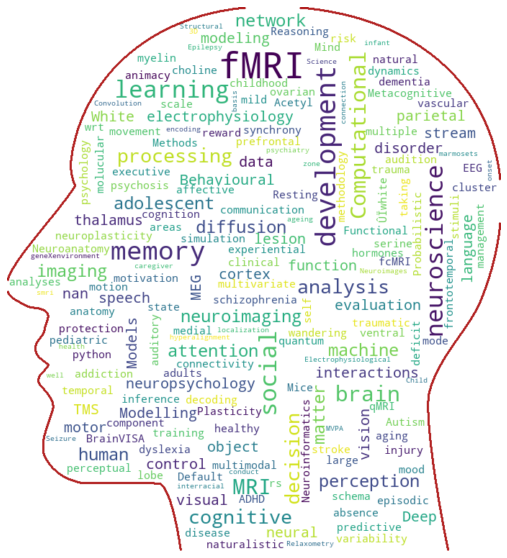

In [18]:

# Codes for generating a word cloud image:
wdcd = WordCloud(mask=tf_head_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")


# Save the image in the img folder:
#wdcd.to_file("head_wordcloud.png")

### Example 2: plot wordcloud in a whole brain mask
<img src="img/brain.png" width="150" style="float: left">



In [19]:
brain_mask = np.array(Image.open("img/brain.png"))
if len(brain_mask.shape) ==3:
 brain_mask = brain_mask[:,:,-1]


In [20]:
# Transform your mask into a new one that will work with the function:
tf_brain_mask = np.ndarray((brain_mask.shape[0],brain_mask.shape[1]), np.int32)

for i in range(len(brain_mask)):
    tf_brain_mask[i] = list(map(transform_format, brain_mask[i]))
    
#tf_brain_mask

(-0.5, 688.5, 588.5, -0.5)

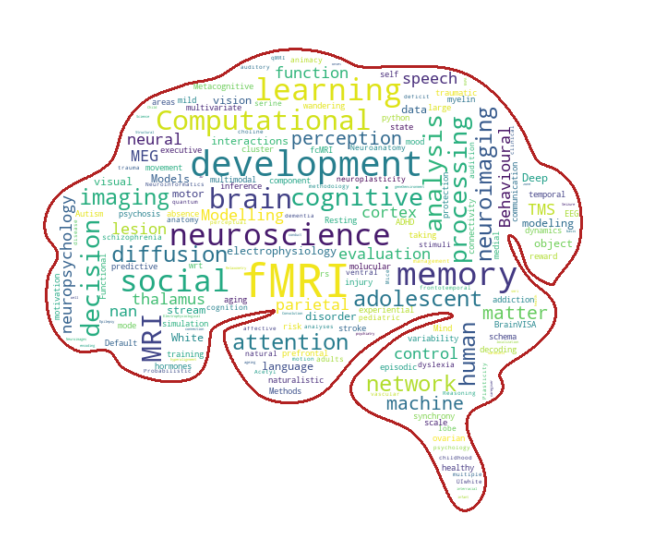

In [21]:

# Create and generate a word cloud image:
wdcd = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")


# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

## Plotting Similarity in PhD topics by Continents

Note: there are much better ways to recode the data and split them by continents.
Here, the example uses (for practice purpose) the __geocoders__ function from __geopy__ library to retrieve the latitude and longitude coordinates of a location and then we class them into different continents

In [22]:
#loading required geopy functions
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="neuromap_cloud")

from geopy.exc import GeocoderTimedOut

#Many users encounter the issue of GeocoderTimedOut - this problem appears because you tried to request this address multiple times
#The codes below will keep retrying the do_geocode function until it manages to return without a Timeout exception being raised. 
def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [23]:
##These variables have already been created
#phd_loc = df.phd_loc
#phd_res = df.phd_research

#creating a new data_subset dropping NaN cases in the PhD field
df_phd_sset = df.dropna(subset=["phd_loc"])


In [24]:

#Loop through rows to get the longitude and latitude of the PhD towns (where the attendees are doing/did thier PhDs)
lat=[]
long=[]

for phdTownLoc in df_phd_sset.phd_loc:
    location_1 = do_geocode(phdTownLoc) #, timeout=10)
    #print((location_1.latitude, location_1.longitude, phdTownLoc))    
    
    lat.append(location_1.latitude)
    long.append(location_1.longitude)


In [26]:
       
#Saving lat and long in separate columns in the dataframe    
df_phd_sset['phdTownLatitude'] = lat
df_phd_sset['phdTownLatitude'] = df_phd_sset['phdTownLatitude'].astype('float')

df_phd_sset['phdTownLongitude'] = long
df_phd_sset['phdTownLongitude'] = df_phd_sset['phdTownLongitude'].astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [27]:
#Using the longtitudes and latitudes extracted for the towns, classify them into different continents (based on different conditional statements)

df_phd_sset["phd_continent"] = ""
phdTLong = df_phd_sset.phdTownLongitude
phdTLat = df_phd_sset.phdTownLatitude


#north-america-long: -180 to -50
#north-america-lat: +10 to +90
mask = (phdTLong > -180)
mask &= (phdTLong < -50)
mask &= (phdTLat > 10)
mask &= (phdTLat < 90)
df_phd_sset.loc[mask, 'phd_continent'] = "NAmerica"

#south-america-long: -85 to -30
#south-america-lat: -60 to +10
mask = (phdTLong > -85)
mask &= (phdTLong < -30)
mask &= (phdTLat > -60)
mask &= (phdTLat < 10)
df_phd_sset.loc[mask, 'phd_continent'] = "SAmerica"

#europe-long: -15 to +60
#europe-lat: +35 to +70
mask = (phdTLong > -15)
mask &= (phdTLong < 60)
mask &= (phdTLat > 35)
mask &= (phdTLat < 70)
df_phd_sset.loc[mask, 'phd_continent'] = "Europe"


#asia-long: +30 to 180
#asia-lat: -50 to +90
mask = (phdTLong > 30)
mask &= (phdTLong < 180)
mask &= (phdTLat > -50)
mask &= (phdTLat < 90)
df_phd_sset.loc[mask, 'phd_continent'] = "AsiaPac"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
#subsetting the df_phd_sset dataframe by different continents
df_phd_NAm = df_phd_sset[df_phd_sset.phd_continent=="NAmerica"] 
df_phd_Eur = df_phd_sset[df_phd_sset.phd_continent=="Europe"]
df_phd_AP = df_phd_sset[df_phd_sset.phd_continent=="AsiaPac"] 

In [30]:
## these are the variables we are interested
phd_res_NAm = df_phd_NAm.phd_research
phd_res_Eur = df_phd_Eur.phd_research
phd_res_AP = df_phd_AP.phd_research

# joining responses from participants/entries as one long string (split by continents)
textNAm =" ".join(str(dscp) for dscp in phd_res_NAm)
textEur =" ".join(str(dscp) for dscp in phd_res_Eur)
textAP =" ".join(str(dscp) for dscp in phd_res_AP)

#update STOPWORDS if necessary
stopwords=set(STOPWORDS)
stopwords.update(["in","along","and","making"])


In [102]:

#Generating a word cloud image (per continent):
wc_NAm = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='firebrick')
wc_NAm.generate(textNAm)

wc_Eur = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='green')
wc_Eur.generate(textEur)

wc_AP = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='orange')
wc_AP.generate(textAP)

#Create an array of the created variables (images)
wordcloud = [wc_NAm, wc_Eur, wc_AP]
continent = ["N. America", "Europe", "Asia-Pacific"]
color = ["firebrick", "green", "orange"]
num = [len(phd_res_NAm), len(phd_res_Eur), len(phd_res_AP)]


### Illustration 1: plots (by continents) side by side

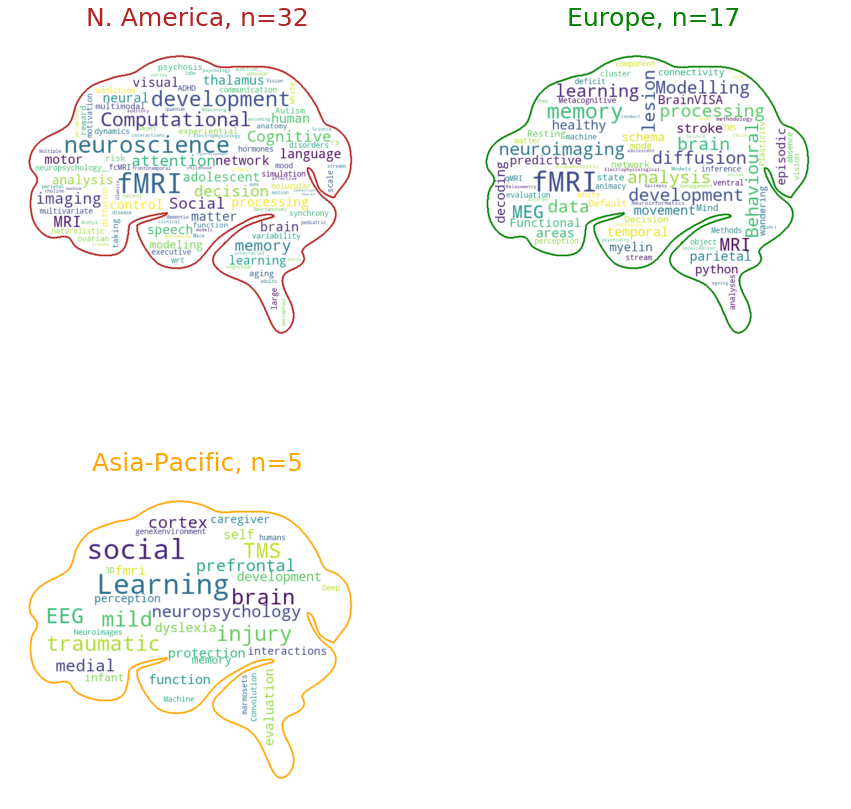

In [114]:
#using plt.subplots to display all 3 cases altogether
fig, axs = plt.subplots(2,2, figsize=(15,15))
fig.delaxes(axs[1,1])  #leaving (1,1) out

coord = [(0,0), (0,1), (1,0)]  

for ii, coordinate in enumerate(coord):
    ax = axs[coordinate]
    ax.imshow(wordcloud[ii], interpolation='bilinear')
    ax.set_title('%s, n=%s' % (continent[ii], num[ii]), fontsize=25, color=color[ii])
    ax.set_axis_off()


### Illustration 2: interactive plots using ipywidgets

In [115]:
#import neccessary module to run interactive features
from ipywidgets import interact, IntSlider


In [116]:
#wordcloud = [wc_NAm, wc_Eur, wc_AP]
#continent = ["N. America", "Europe", "Asia-Pacific"]
#color = ["firebrick", "green", "orange"]

#using widgets to create interactive plots

def browse_images(wordcloud):
    n = len(wordcloud)
    def view_image(ii):
        plt.figure(figsize=[16,8])
        plt.imshow(wordcloud[ii], cmap=plt.cm.gray_r, interpolation='bilinear')
        plt.axis("off")
        plt.title('PhD research by Continent: \n %s, n=%s' % (continent[ii], num[ii]), fontsize=25, color=color[ii])

    interact(view_image, ii=IntSlider(min=0,max=n-1))
    

In [117]:
browse_images(wordcloud)


interactive(children=(IntSlider(value=0, description='ii', max=2), Output()), _dom_classes=('widget-interact',…

## Plotting Similarity in research topics by Academic Stages

In [123]:
## these are the variables we are interested
ug_res = df.undergrad_research
ra_res = df.ra_lm_research
mas_res = df.masters_research
phd_res = df.phd_research

#creating a new data_subset dropping NaN cases in the PhD field
ug_res = ug_res.dropna()
ra_res = ra_res.dropna()
mas_res = mas_res.dropna()
phd_res = phd_res.dropna()

# joining responses from participants/entries as one long string (split by academic stages)
textug =" ".join(str(dscp) for dscp in ug_res)
textra =" ".join(str(dscp) for dscp in ra_res)
textmas =" ".join(str(dscp) for dscp in mas_res)
textphd =" ".join(str(dscp) for dscp in phd_res)

#update STOPWORDS if necessary
#stopwords=set(STOPWORDS)
#stopwords.update(["in","along","and","making"])


In [124]:
#Generating a word cloud image (per academic stage):
wc_ug = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='green')
wc_ug.generate(textug)

wc_ra = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='orangered')
wc_ra.generate(textra)

wc_mas = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='darkviolet')
wc_mas.generate(textmas)

wc_phd = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='darkblue')
wc_phd.generate(textphd)

#Create an array of the created variables (images)
wordcloud_acad = [wc_ug, wc_ra, wc_mas, wc_phd]
acadstage = ["Undergrad", "RA", "Masters","PhD"]
color = ["green", "orangered", "darkviolet","darkblue"]



In [125]:
#using widgets to create interactive plots
def browse_images(wordcloud):
    n = len(wordcloud)
    def view_image(ii):
        plt.figure(figsize=[16,8])
        plt.imshow(wordcloud[ii], cmap=plt.cm.gray_r, interpolation='bilinear')
        plt.axis("off")
        plt.title('Academic Stage: %s' % acadstage[ii], fontsize=25, color=color[ii])

    interact(view_image, ii=IntSlider(min=0,max=n-1))

In [126]:
browse_images(wordcloud_acad)

interactive(children=(IntSlider(value=0, description='ii', max=3), Output()), _dom_classes=('widget-interact',…